IMPORT IMPORTANT LIBRARIES AND DATASET:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
terrorism = pd.read_csv('/kaggle/input/global-terrorism-data-base/globalterrorismdb.csv', encoding='latin-1')

ANALYZE DATASET:

In [3]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


RENAME IMPORTANT COLUMNS:

In [5]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype',
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate',
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2',
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide',
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2',
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3',
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3',
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype',
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound',
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property',
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid',
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom',
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

CREATING A NEW DATAFRAME BY SEPARATING TOP 20 IMPORTANT COLUMNS
FOR ANALYSIS:

In [6]:
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3',
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1',
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [7]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [8]:
data.tail()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,1,0,1,0,Armed Assault,Military,Somalia,Al-Shabaab,0.0,1.0,Firearms,1.0,2.0
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,1,1,0,1,0,Bombing/Explosion,Military,Russia,Muslim extremists,0.0,0.0,Explosives,2.0,7.0
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,1,1,1,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,0.0,0.0
181689,201712310031,2017,India,South Asia,Manipur,Imphal,1,1,1,0,0,Bombing/Explosion,Government (General),India,Unknown,0.0,0.0,Explosives,0.0,0.0
181690,201712310032,2017,Philippines,Southeast Asia,Maguindanao,Cotabato City,1,1,1,0,0,Bombing/Explosion,Unknown,Philippines,Unknown,0.0,0.0,Explosives,0.0,0.0


FIND COUNTRY WITH THE HIGHEST NUMBER OF TERRORISTS ATTACKS: 

In [9]:
print("Country with the Highest No. of Terrorist Attacks:",data['Country'].value_counts())

Country with the Highest No. of Terrorist Attacks: Country
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: count, Length: 205, dtype: int64


In [10]:
print("Country with the Highest No. of Terrorist Attacks:",data['Country'].value_counts().index[0])

Country with the Highest No. of Terrorist Attacks: Iraq


FIND REGION WITH THE HIGHEST NUMBER OF TERRORIST ATTACKS:

In [11]:
print("Region with the Highest No. of Terrorist Attacks:",data['Region'].value_counts().index[0])

Region with the Highest No. of Terrorist Attacks: Middle East & North Africa


FIND MAXIMUM NUMBER OF PEOPLE KILLED BY A SINGLE TERRORISTS ATTACK:

In [12]:
print("Maximum No. of people killed by a single terrorist Attack are:",data['Nkill'].max())

Maximum No. of people killed by a single terrorist Attack are: 1570.0


In [13]:
data['Damage']=data['Nkill']+data['Nwound']

In [14]:
data['Damage']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Damage, Length: 181691, dtype: float64

In [15]:
data['Country']=data['Country'].replace('South Veitnam','Veitnam',regex=True)

In [16]:
data['Weaptype']=data['Weaptype'].replace('Vehicle.*','Vehicle',regex=True)

In [17]:
data['Attacktype']=data['Attacktype'].replace('Hostage Taking.*','Hostage Taking',regex=True)

FIND DOMINANT ATTACK TYPE:

In [18]:
atk_filtered=data['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                          'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')

In [19]:
attack_type=atk_filtered.value_counts().tolist()

In [20]:
attack_type

[88255, 42669, 19312, 12149, 10356, 8950]

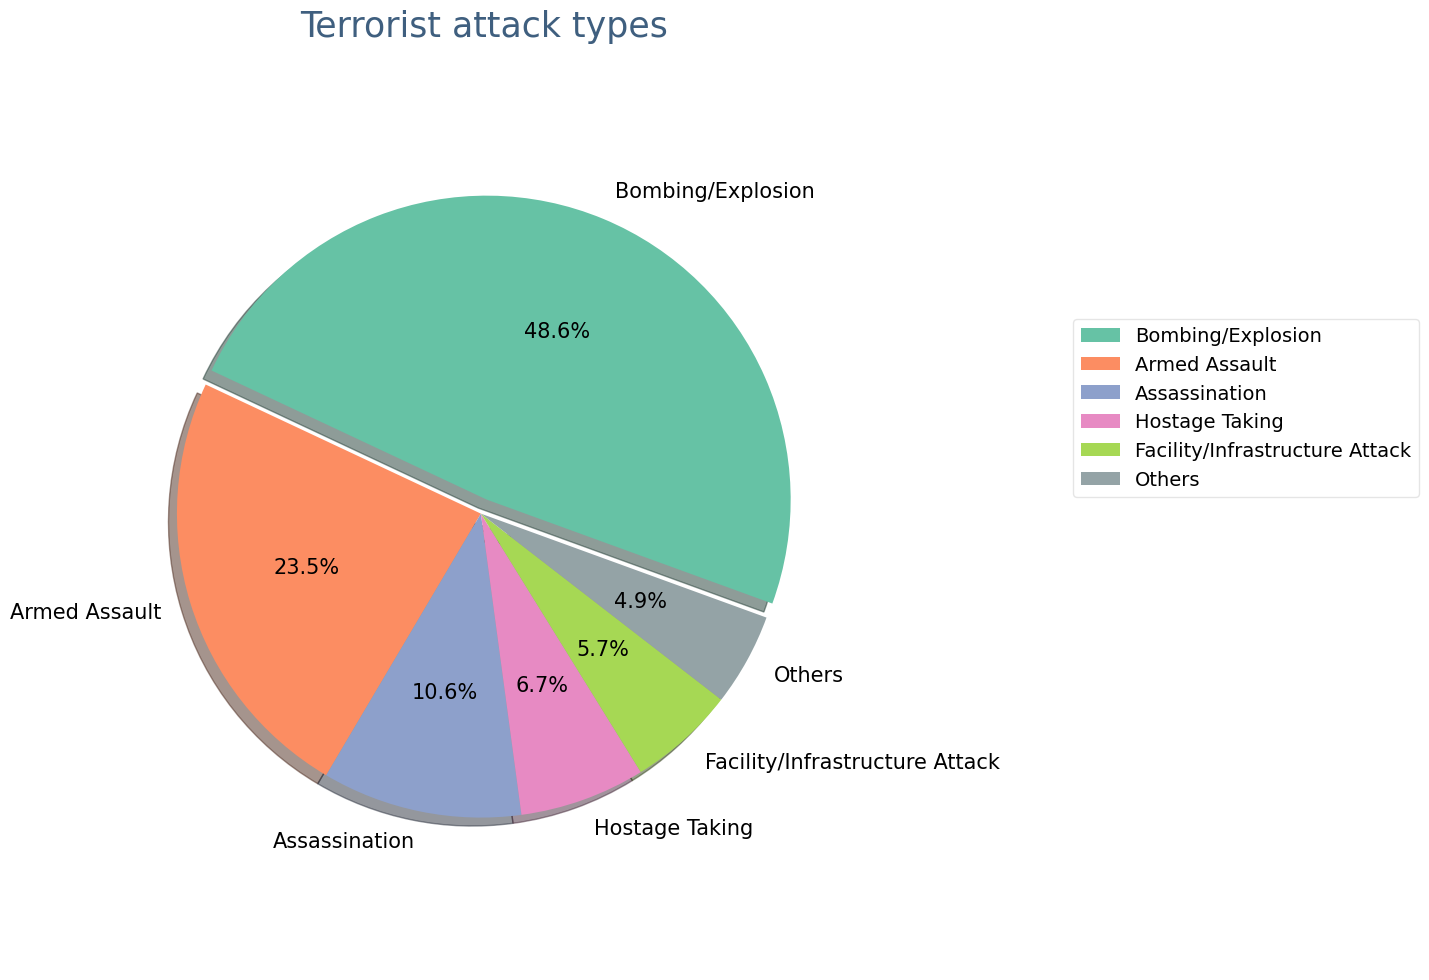

In [21]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']
sizes=[]
for i in attack_type:
    percent=(i*100)/len(data['Attacktype'])
    sizes.append(percent)
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-20,
                              shadow=True,explode=(0.05,0,0,0,0,0),
                              colors=sns.color_palette('Set2',8)[:5]+
                              [(0.58,0.64,0.65)],
                              textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack types',fontsize=25,pad=-70,
         color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
         prop={'size':14})
fig.show()

CHECK DAMAGE RATE w.r.t ATTACK TYPES:

In [22]:
cat=["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking","Facility/Infrastructure Attack"]

In [23]:
color_cat=sns.color_palette("Set2",8)[:5]

In [24]:
color_cat_dict=dict(zip(cat,color_cat))

In [25]:
color_cat_dict

{'Bombing/Explosion': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Armed Assault': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Assassination': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Hostage Taking': (0.9058823529411765,
  0.5411764705882353,
  0.7647058823529411),
 'Facility/Infrastructure Attack': (0.6509803921568628,
  0.8470588235294118,
  0.32941176470588235)}

In [26]:
table1=data[["Attacktype","Damage"]].groupby("Attacktype",as_index=False).sum().sort_values(by="Damage",ascending=False)

In [27]:
table1=table1.reset_index()

In [28]:
table1

,index,Attacktype,Damage
0,2,Bombing/Explosion,514233.0
1,0,Armed Assault,212386.0
2,7,Unknown,39606.0
3,1,Assassination,37209.0
4,5,Hostage Taking,27732.0
5,4,Hijacking,20642.0
6,6,Unarmed Assault,14791.0
7,3,Facility/Infrastructure Attack,6293.0


In [29]:
inci=[8825,42669,7276,19312,12149,659,1015,10356]

In [30]:
table1["Incidents"]=np.array(inci)

In [31]:
table1["Damage rate"]=table1["Damage"]/table1["Incidents"]

In [32]:
table1

,index,Attacktype,Damage,Incidents,Damage rate
0,2,Bombing/Explosion,514233.0,8825,58.270028
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


In [33]:
labels=table1["Attacktype"].tolist()
labels

['Bombing/Explosion',
 'Armed Assault',
 'Unknown',
 'Assassination',
 'Hostage Taking',
 'Hijacking',
 'Unarmed Assault',
 'Facility/Infrastructure Attack']

In [34]:
x=np.arange(len(labels))

In [35]:
dmg=table1["Damage"].tolist()

In [36]:
gray=(0.5,0.64,0.65)

In [37]:
color_list=[color_cat_dict[ter_type] if
            ter_type in color_cat_dict.keys() else gray for ter_type in labels]




In [38]:
d_rate=table1["Damage rate"].tolist()

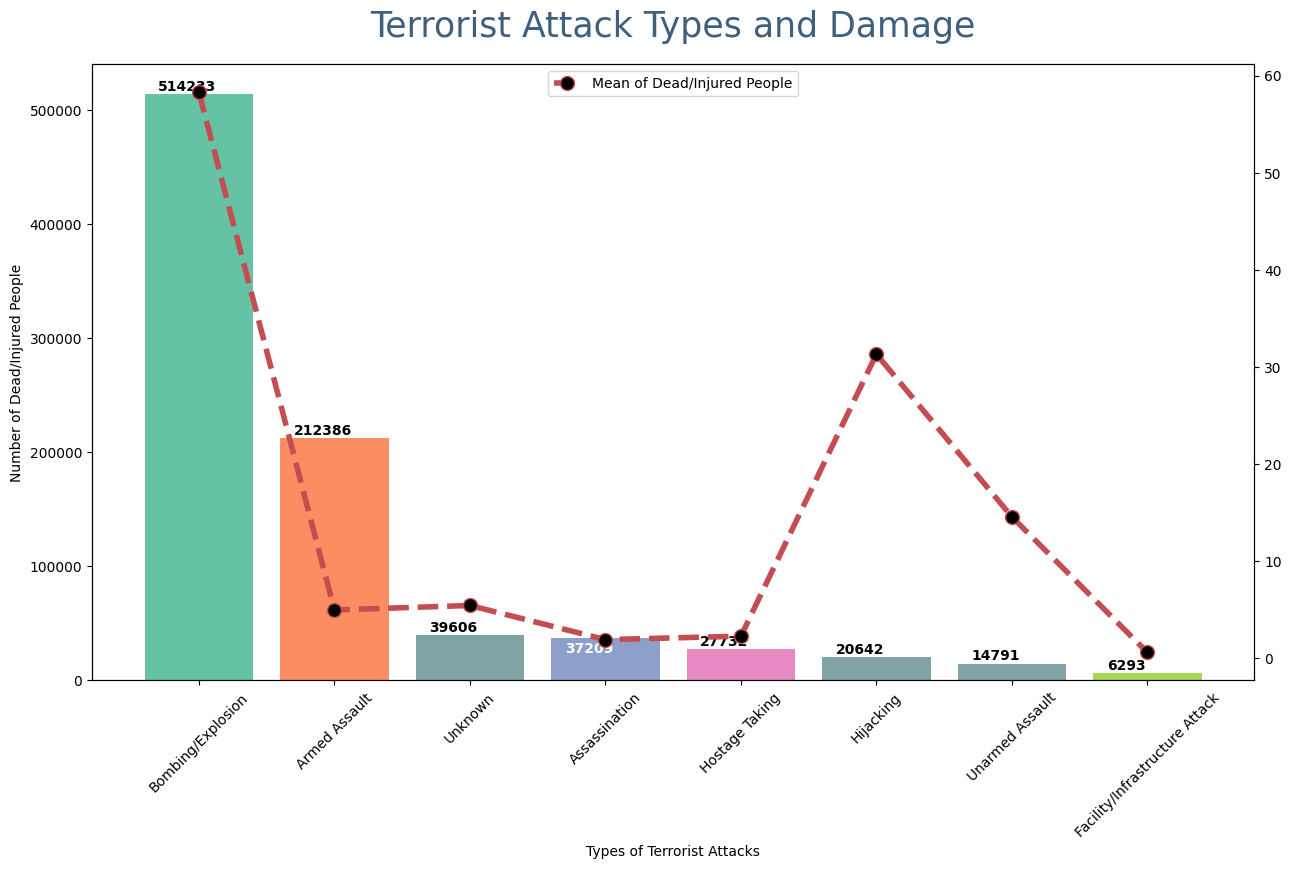

In [39]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(labels,dmg,color=color_list,align='center')
#Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [40]:
table2=data[["Weaptype","Damage"]].groupby("Weaptype",as_index=False).sum().sort_values(by="Damage",ascending=False)

In [41]:
table2

,Weaptype,Damage
2,Explosives,537788.0
4,Firearms,225473.0
10,Unknown,50167.0
11,Vehicle,20297.0
6,Melee,14489.0
1,Chemical,14377.0
5,Incendiary,8898.0
0,Biological,814.0
9,Sabotage Equipment,357.0
7,Other,225.0


In [42]:
df_count=data["Weaptype"].value_counts()

In [43]:
df_count

Weaptype
Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: count, dtype: int64

In [44]:
df_count=df_count.reindex(table2["Weaptype"].values)

In [45]:
df_count

Weaptype
Explosives            92426
Firearms              58524
Unknown               15157
Vehicle                 136
Melee                  3655
Chemical                321
Incendiary            11135
Biological               35
Sabotage Equipment      141
Other                   114
Radiological             14
Fake Weapons             33
Name: count, dtype: int64

In [46]:
table2["Weapcount"]=df_count.values

In [47]:
table2

,Weaptype,Damage,Weapcount
2,Explosives,537788.0,92426
4,Firearms,225473.0,58524
10,Unknown,50167.0,15157
11,Vehicle,20297.0,136
6,Melee,14489.0,3655
1,Chemical,14377.0,321
5,Incendiary,8898.0,11135
0,Biological,814.0,35
9,Sabotage Equipment,357.0,141
7,Other,225.0,114


In [48]:
table2["Weap_Damage_rate"]=table2["Damage"]/table2["Weapcount"]

In [49]:
table2

,Weaptype,Damage,Weapcount,Weap_Damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


CHECK DAMAGE RATE w.r.t WEAPON TYPES:

In [50]:
weaplabels=table2["Weaptype"].tolist()
weaplabels

['Explosives',
 'Firearms',
 'Unknown',
 'Vehicle',
 'Melee',
 'Chemical',
 'Incendiary',
 'Biological',
 'Sabotage Equipment',
 'Other',
 'Radiological',
 'Fake Weapons']

In [51]:
y=np.arange(len(weaplabels))

In [52]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [53]:
weapdmg=table2["Damage"].tolist()

In [54]:
weapdmg

[537788.0,
 225473.0,
 50167.0,
 20297.0,
 14489.0,
 14377.0,
 8898.0,
 814.0,
 357.0,
 225.0,
 6.0,
 1.0]

In [55]:
wgray=(0.5,0.64,0.65)

In [56]:
w_cat=["Explosives","Firearms","Unknown,Incendiary"]

In [57]:
wcolorcat=sns.color_palette("Set2",8)[:4:1]

In [58]:
wcolorcat

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

In [59]:
wcolor_cat_dict=dict(zip(w_cat,wcolorcat))

In [60]:
wcolor_cat_dict

{'Explosives': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Firearms': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Unknown,Incendiary': (0.5529411764705883,
  0.6274509803921569,
  0.796078431372549)}

In [61]:
wcolor_list=[wcolor_cat_dict[ter_type]if
            ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]

In [62]:
wcolor_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65)]

In [63]:
w_rate=table2["Weap_Damage_rate"].tolist()

In [64]:
w_rate

[5.818579187674464,
 3.8526587382954003,
 3.3098238437685557,
 149.24264705882354,
 3.964158686730506,
 44.78816199376947,
 0.7991019308486753,
 23.257142857142856,
 2.5319148936170213,
 1.9736842105263157,
 0.42857142857142855,
 0.030303030303030304]

PLOTTING:

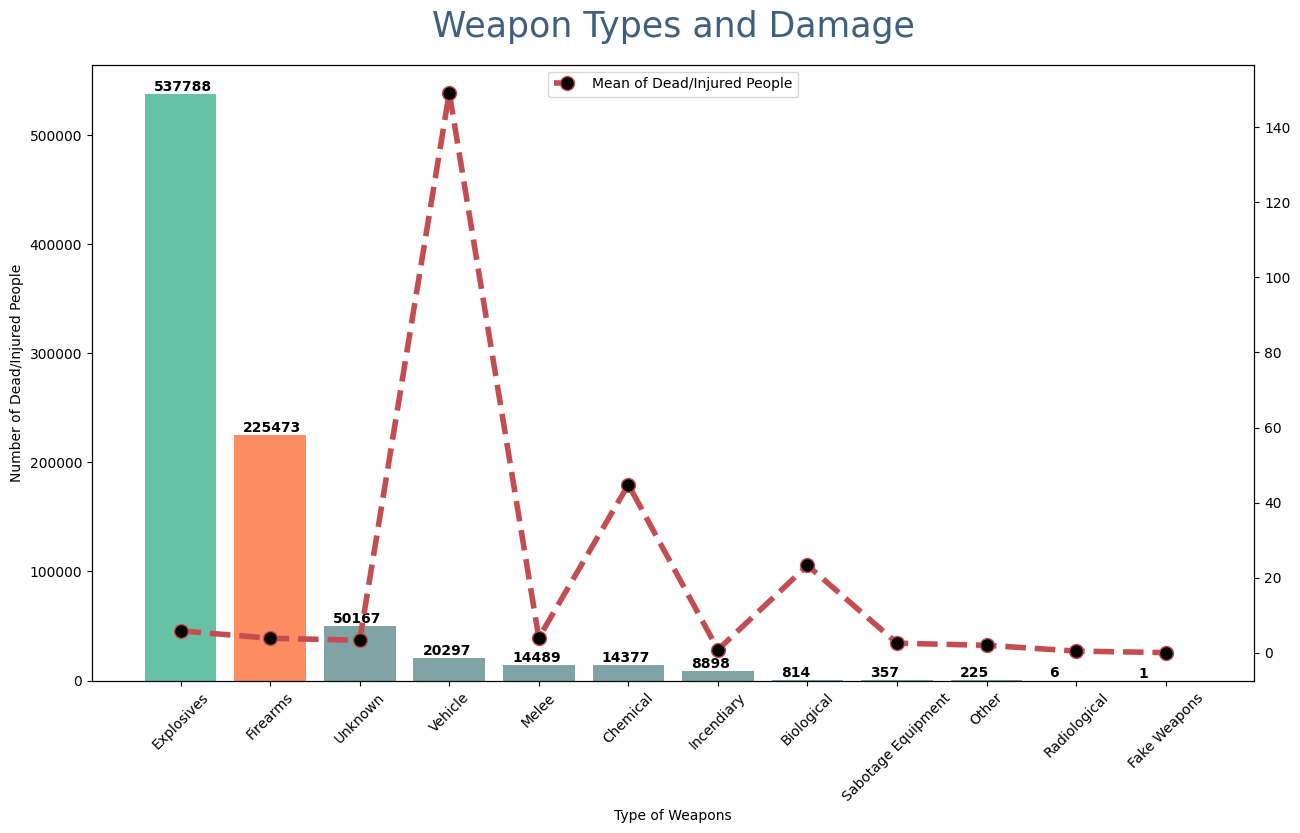

In [65]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(weaplabels,weapdmg,color=wcolor_list,align='center')
#Number in bar chart
for i,v in enumerate(weapdmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Weapon Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Type of Weapons',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()


TOP 10 TARGETED COUNTRIES FROM 2000 TO 2011:

In [66]:
country_damage= data[data["Year"]>1999][["Country","Damage"]].groupby("Country",as_index=False).sum()

In [67]:
country_damage

,Country,Damage
0,Afghanistan,78988.0
1,Albania,3.0
2,Algeria,6724.0
3,Angola,1773.0
4,Argentina,5.0
...,...,...
162,Western Sahara,3.0
163,Yemen,16122.0
164,Yugoslavia,30.0
165,Zambia,2.0


In [68]:
data_paint=country_damage.sort_values(by="Damage",ascending=False).head(10)

In [69]:
data_paint

,Country,Damage
69,Iraq,201126.0
0,Afghanistan,78988.0
110,Pakistan,54873.0
65,India,27251.0
156,United States,21520.0
108,Nigeria,20874.0
142,Syria,20754.0
163,Yemen,16122.0
131,Somalia,15930.0
115,Philippines,11896.0


PLOTTING:

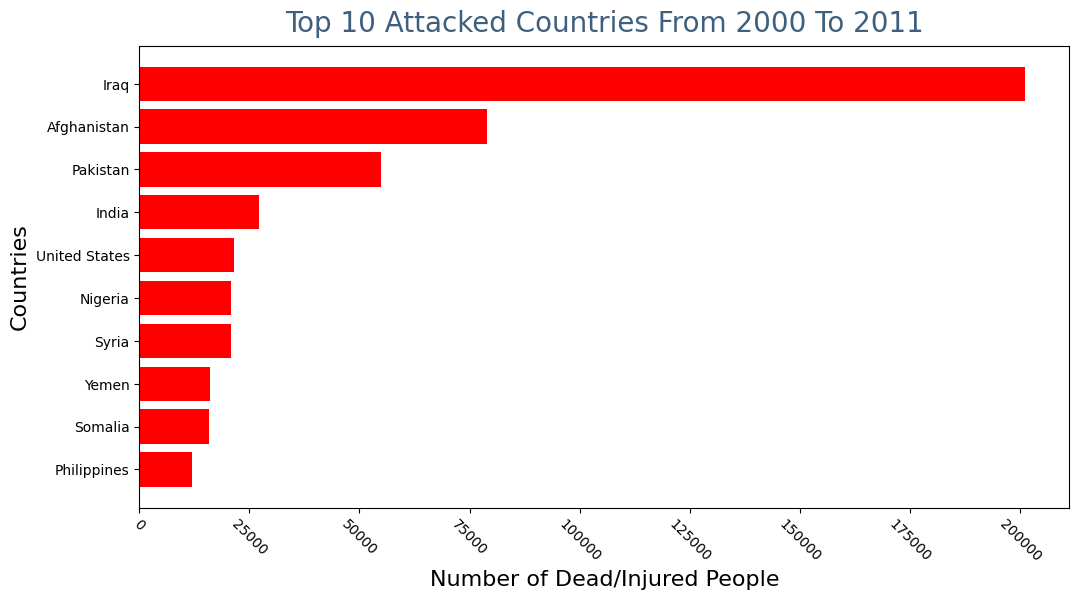

In [70]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint['Country'][::-1],data_paint['Damage'][::-1],color='red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Attacked Countries From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

TOP 10 TARGETED NATIONALITIES FROM 2000 TO 2011:

In [71]:
nalty_dmg=data[data["Year"]>1999][["Natlty1","Damage"]].groupby("Natlty1",as_index=False).sum()

In [72]:
nalty_dmg

,Natlty1,Damage
0,Afghanistan,71886.0
1,Albania,34.0
2,Algeria,6571.0
3,Angola,1779.0
4,Argentina,26.0
...,...,...
181,West Bank and Gaza Strip,1063.0
182,Yemen,15622.0
183,Yugoslavia,37.0
184,Zambia,6.0


In [73]:
data["Natlty1"]

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
181686               Somalia
181687                Russia
181688           Philippines
181689                 India
181690           Philippines
Name: Natlty1, Length: 181691, dtype: object

In [74]:
data_paint_natly=nalty_dmg.sort_values(by='Damage',ascending=False).head(10)

In [75]:
data_paint_natly=nalty_dmg.sort_values(by="Damage",ascending=False).head(10)

In [76]:
data_paint_natly

,Natlty1,Damage
74,Iraq,196387.0
0,Afghanistan,71886.0
123,Pakistan,53901.0
70,India,27296.0
174,United States,25035.0
118,Nigeria,20643.0
159,Syria,20342.0
182,Yemen,15622.0
147,Somalia,13516.0
128,Philippines,11702.0


PLOTTING:

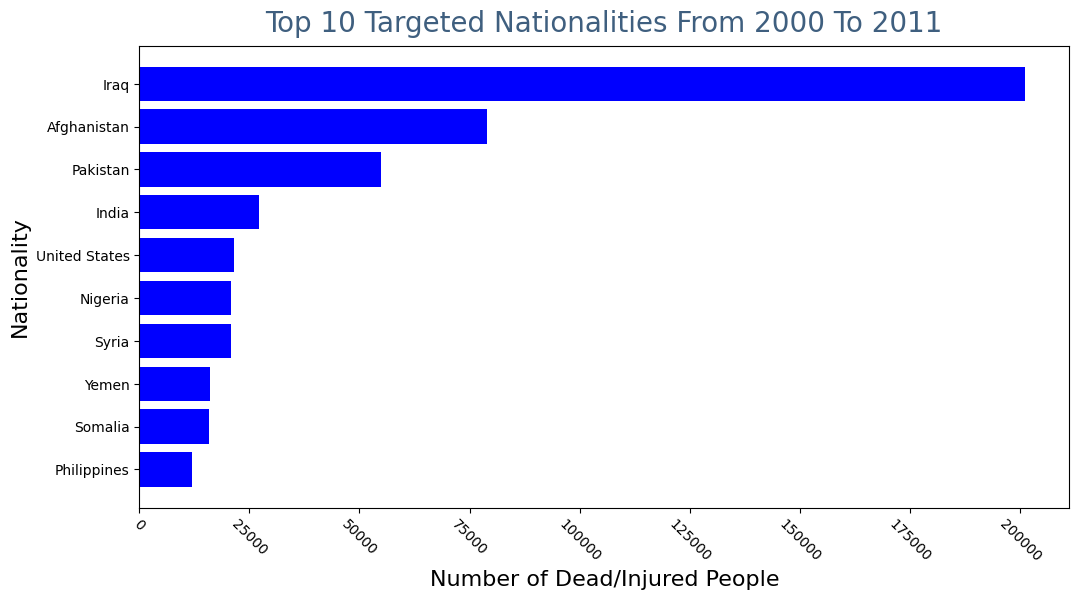

In [77]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint_natly['Natlty1'][::-1],data_paint['Damage'][::-1],color='blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Targeted Nationalities From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()


THE SAFEST COUNTRIES FROM 2000 TO 2017 WHICH HAVE "0" DEAD/INJURED PEOPLE CAUSED BY TERRORIST ATTACKS:

In [78]:
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


In [79]:
country_damage

,Country,Damage
0,Afghanistan,78988.0
1,Albania,3.0
2,Algeria,6724.0
3,Angola,1773.0
4,Argentina,5.0
...,...,...
162,Western Sahara,3.0
163,Yemen,16122.0
164,Yugoslavia,30.0
165,Zambia,2.0


In [80]:
len(country_damage[country_damage["Damage"]==0])

10

TIME-SERIES TOP 10 ATTACKED COUNTRIES AND TOP 10 TARGETED NATIONALITIES:

In [81]:
def country_nationality(n):
    ''' Function to draw the bar charts of top 10
    Attacked Countries and Top 10 Targeted Nationalities'''
    #Filter data and choose top 10 Attacked Counties
    top10_bad=data[data['Year']==n][['Country','Damage']].groupby('Country',as_index=False).sum()
    data_paint=top10_bad.sort_values(by='Damage',ascending=False).head(10)
    fig,ax=plt.subplots(1,2,figsize=(16,4))
    ax[0].barh(data_paint['Country'][::-1],data_paint['Damage'][::-1],
               color=['red','green','#344650','#df2029','#FFFC00',
                     '#E4405F','#3B5999','#00c300','#ff0084'])
    ax[0].set_ylabel('Countries',size=16)
    ax[0].set_xlabel('Number of Dead/Injured People',size=16)
    ax[0].set_title('Top 10 Attacked Countries %d' %n,fontsize=15,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])

    plt.subplots_adjust(wspace=0.3)

    #Choose column Country and Damage from data
    nalty_dmg=data[data['Year']>1999][['Natlty1','Damage']].groupby('Natlty1',as_index=False).sum()
    data_paint_natly=nalty_dmg.sort_values(by='Damage',ascending=False).head(10)
    ax[1].barh(data_paint_natly['Natlty1'][::-1],data_paint['Damage'][::-1],color='blue')
    ax[1].set_ylabel('Nationality',size=16)
    ax[1].set_xlabel('Number of Dead/Injured People',size=16)
    ax[1].set_title('Top 10 Targeted Nationalities %d' %n,fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
    plt.show()
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

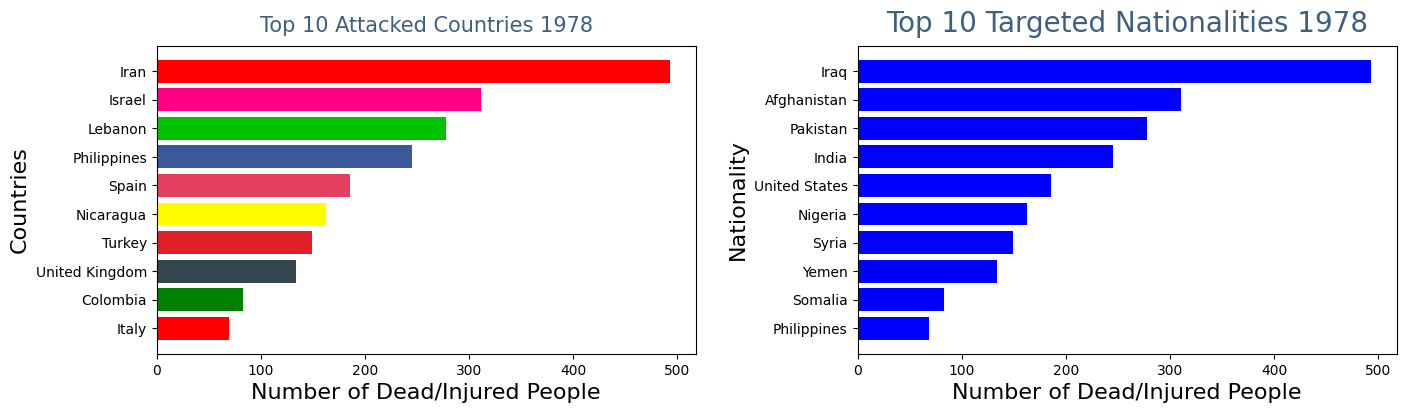

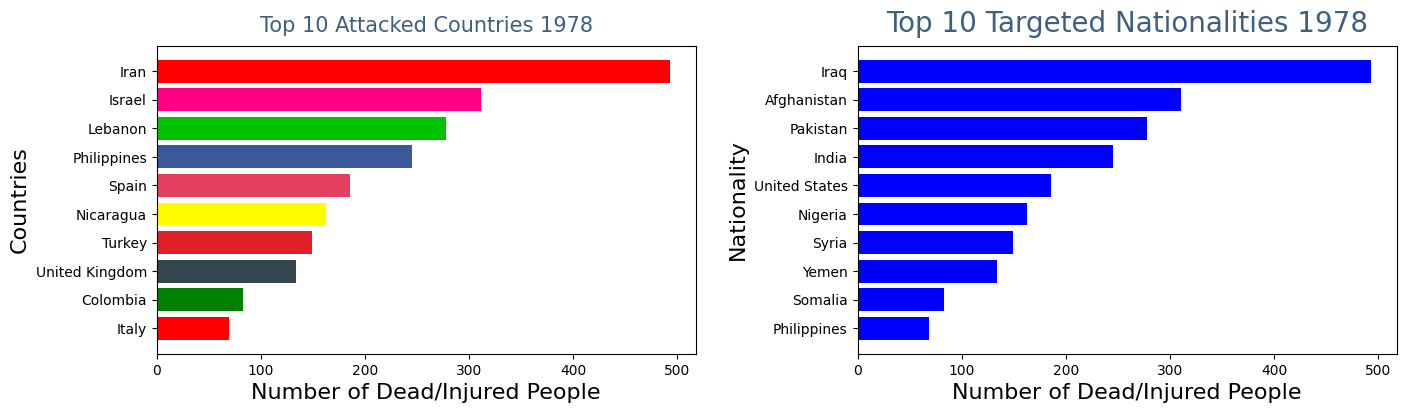

In [ ]:
list_year=[]
for year in range(1970,1993): list_year.append(year)




for year in range(1994,2012): list_year.append(year)




for year in list_year:
    country_nationality(year)
    time.sleep(2)
    clear_output()


THE TOP 10 ATTACKED COUNTRIES AND TOP 10 TARGETED NATIONALITIES WITH THE SPECIFIC YEAR INPUT:

In [ ]:
def country_nationality_year():
    ''' Function to paint chart with specific input year'''
    # Input year. Try if in list year
    try:
        year=int(input('Input the year you want to see chart! (1970-2011): '))
        if year==1993:
            print('Sorry, No Terrorism Data in 1993')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
        while year not in list_year:
            print('Please input the year from 1970 to 2011')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
    except (ValueError,ZeroDivisionError) as ex:
        print('Wrong Type, Input Again: ')
        country_nationality_year()
    else:
        country_nationality(year)




country_nationality_year()
